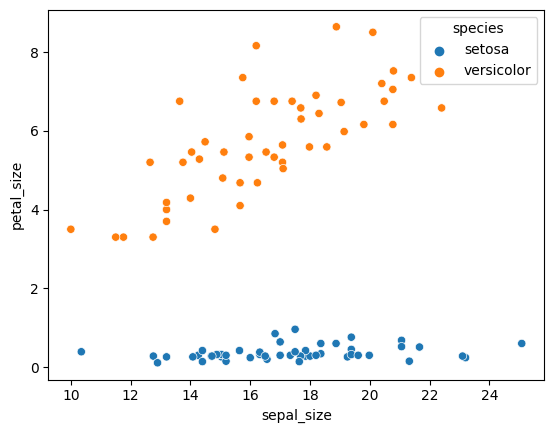

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = sns.load_dataset('iris')

iris = iris[iris['species'] != 'virginica']

iris['sepal_size'] = iris['sepal_length'] * iris['sepal_width']
iris['petal_size'] = iris['petal_length'] * iris['petal_width']

df = iris.drop(columns=['petal_length', 'sepal_length', 'petal_width', 'sepal_width'],axis = 1)

pontos_df = [(row['sepal_size'], row['petal_size']) for _, row in df.iterrows()]


sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')

plt.show()

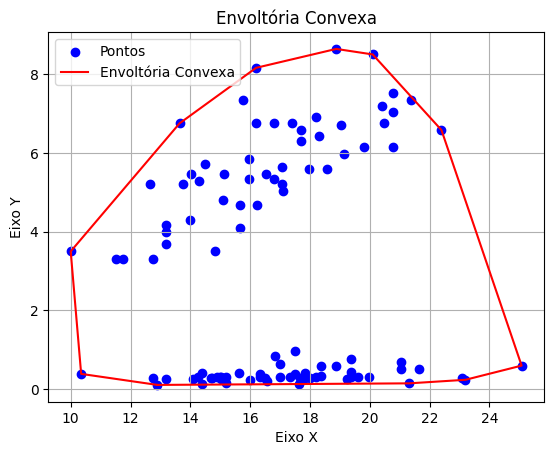

In [22]:
import matplotlib.pyplot as plt
import math

# Função para calcular a orientação dos pontos
def orientacao(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else 2  # Horário ou anti-horário

# Função para encontrar o ponto mais baixo (e mais à esquerda)
def ponto_mais_baixo(pontos):
    o_ponto_mais_baixo = pontos[0]
    for ponto in pontos:
        if ponto[1] < o_ponto_mais_baixo[1] or (ponto[1] == o_ponto_mais_baixo[1] and ponto[0] < o_ponto_mais_baixo[0]):
            o_ponto_mais_baixo = ponto
    return o_ponto_mais_baixo

# Função para ordenar pontos angularmente a partir do ponto mais baixo
def ordenar_pontos_angularmente(pontos):
    o_ponto_mais_baixo = ponto_mais_baixo(pontos)
    return sorted(pontos, key=lambda ponto: (math.atan2(ponto[1] - o_ponto_mais_baixo[1], ponto[0] - o_ponto_mais_baixo[0]), ponto))

# Função para calcular a envoltória convexa
def envoltoria_convexa(pontos):
    n = len(pontos)
    if n < 3:
        return None  # Não é possível calcular a envoltória convexa com menos de 3 pontos

    pontos_ordenados = ordenar_pontos_angularmente(pontos)
    envoltoria = [pontos_ordenados[0], pontos_ordenados[1]]

    for i in range(2, n):
        while len(envoltoria) > 1 and orientacao(envoltoria[-2], envoltoria[-1], pontos_ordenados[i]) != 2:
            envoltoria.pop()
        envoltoria.append(pontos_ordenados[i])

    return envoltoria


# Calcular a envoltória convexa
envoltoria = envoltoria_convexa(pontos_df)

# Plotar os pontos e a envoltória convexa
x, y = zip(*pontos_df)
env_x, env_y = zip(*envoltoria)

plt.scatter(x, y, c='b', marker='o', label='Pontos')
plt.plot(env_x + (env_x[0],), env_y + (env_y[0],), linestyle='-', color='r', label='Envoltória Convexa')
plt.legend()
plt.title('Envoltória Convexa')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.show()


In [23]:
x, y = df.shape
tipo1 = []
tipo2 = []
for i in range (0,x):
    if df['species'][i] == "setosa":
        tipo1.append(((df["petal_size"][i]+5), df["sepal_size"][i]))
    else:
        tipo2.append((df["petal_size"][i], df["sepal_size"][i]))


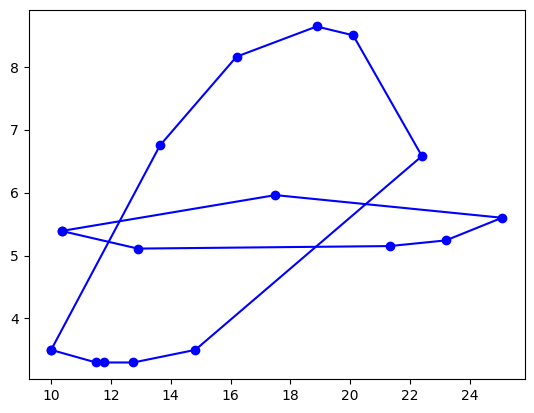

In [24]:
envoltoria11 = envoltoria_convexa(tipo1)
envoltoria22= envoltoria_convexa(tipo2)


y, x = zip(*envoltoria11)

# Criar um gráfico e plotar os pontos
plt.plot(x + (x[0],), y + (y[0],), linestyle='-', marker='o', color='b')

d, c = zip(*envoltoria22)

# Criar um gráfico e plotar os pontos
plt.plot(c + (c[0],), d + (d[0],), linestyle='-', marker='o', color='b')



In [25]:
import matplotlib.pyplot as plt

# Função para determinar a orientação de três pontos (p, q, r)
def orientacao(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else 2  # Horário ou anti-horário

# Função para verificar se dois segmentos de reta se intersectam
def verifica_intersecao(p1, q1, p2, q2):
    o1 = orientacao(p1, q1, p2)
    o2 = orientacao(p1, q1, q2)
    o3 = orientacao(p2, q2, p1)
    o4 = orientacao(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True  # Os segmentos se intersectam

    # Casos especiais de colinearidade
    if o1 == 0 and dentro_do_segmento(p1, p2, q1):
        return True
    if o2 == 0 and dentro_do_segmento(p1, q2, q1):
        return True
    if o3 == 0 and dentro_do_segmento(p2, p1, q2):
        return True
    if o4 == 0 and dentro_do_segmento(p2, q1, q2):
        return True

    return False  # Não há interseção

# Função para verificar se um ponto r está dentro do segmento p-q
def dentro_do_segmento(p, q, r):
    if r[0] >= min(p[0], q[0]) and r[0] <= max(p[0], q[0]) and r[1] >= min(p[1], q[1]) and r[1] <= max(p[1], q[1]):
        return True
    return False

# Função para converter envoltória convexa em segmentos de reta
def envoltoria_para_segmentos(envoltoria):
    segmentos = []
    for i in range(len(envoltoria) - 1):
        segmentos.append((envoltoria[i], envoltoria[i+1]))
    segmentos.append((envoltoria[-1], envoltoria[0]))  # Adicione o último segmento
    return segmentos

# Função para verificar interseções entre duas envoltórias
def verifica_intersecoes_envoltorias(envoltoria1, envoltoria2):
    segmentos1 = envoltoria_para_segmentos(envoltoria1)
    segmentos2 = envoltoria_para_segmentos(envoltoria2)

    intersecoes = []

    for segmento1 in segmentos1:
        for segmento2 in segmentos2:
            if verifica_intersecao(segmento1[0], segmento1[1], segmento2[0], segmento2[1]):
                intersecoes.append((segmento1, segmento2))

    return intersecoes

# Envoltórias Convexas (cada envoltória é uma lista de pontos)

# Verificar as interseções entre as duas envoltórias
intersecoes = verifica_intersecoes_envoltorias(envoltoria11, envoltoria22)

# Plotar as interseções (os segmentos de reta que se intersectam)
plt.figure(figsize=(8, 8))



<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

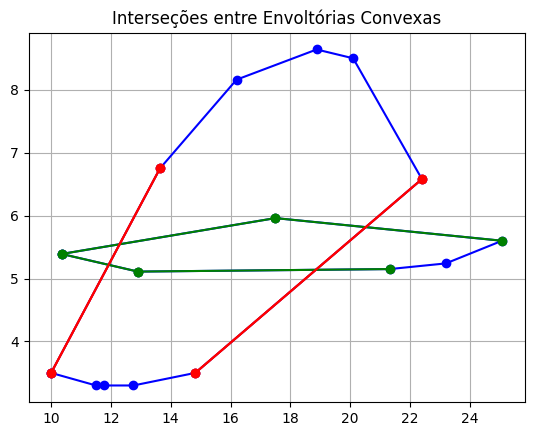

In [26]:
plt.plot(x + (x[0],), y + (y[0],), linestyle='-', marker='o', color='b')

# Criar um gráfico e plotar os pontos
plt.plot(c + (c[0],), d + (d[0],), linestyle='-', marker='o', color='b')

for intersecao in intersecoes:
    segmento1, segmento2 = intersecao
    y1, x1 = zip(*segmento1)
    y2, x2 = zip(*segmento2)
    plt.plot(x1, y1, marker='o', color='green')
    plt.plot(x2, y2, marker='o', color='red')

plt.title('Interseções entre Envoltórias Convexas')
plt.grid(True)
plt.show()


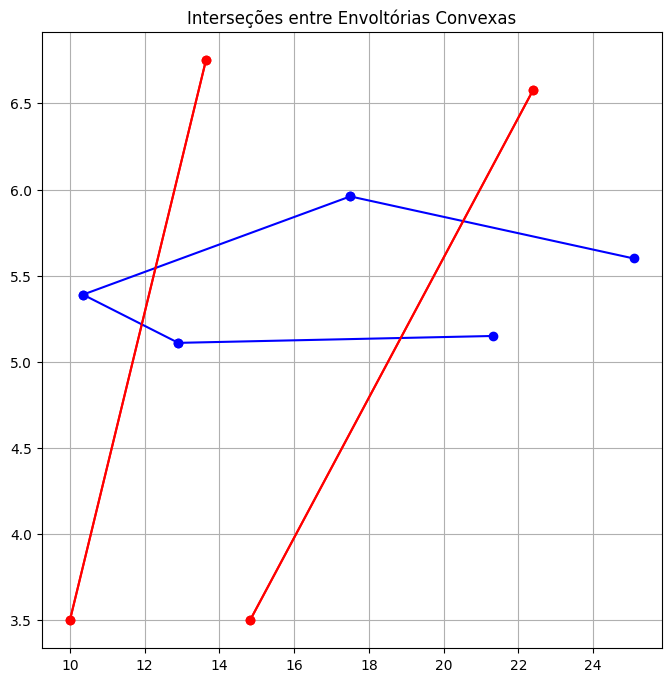

In [28]:
import matplotlib.pyplot as plt

# Função para verificar a orientação de três pontos (p, q, r)
def orientacao(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else 2  # Horário ou anti-horário

# Função para verificar se dois segmentos de reta se intersectam
def verifica_intersecao(p1, q1, p2, q2):
    o1 = orientacao(p1, q1, p2)
    o2 = orientacao(p1, q1, q2)
    o3 = orientacao(p2, q2, p1)
    o4 = orientacao(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True  # Os segmentos se intersectam

    # Casos especiais de colinearidade
    if o1 == 0 and dentro_do_segmento(p1, p2, q1):
        return True
    if o2 == 0 and dentro_do_segmento(p1, q2, q1):
        return True
    if o3 == 0 and dentro_do_segmento(p2, p1, q2):
        return True
    if o4 == 0 and dentro_do_segmento(p2, q1, q2):
        return True

    return False  # Não há interseção

# Função para verificar se um ponto r está dentro do segmento p-q
def dentro_do_segmento(p, q, r):
    if r[0] >= min(p[0], q[0]) and r[0] <= max(p[0], q[0]) and r[1] >= min(p[1], q[1]) and r[1] <= max(p[1], q[1]):
        return True
    return False

# Função para converter envoltória convexa em segmentos de reta
def envoltoria_para_segmentos(envoltoria):
    segmentos = []
    for i in range(len(envoltoria) - 1):
        segmentos.append((envoltoria[i], envoltoria[i+1]))
    segmentos.append((envoltoria[-1], envoltoria[0]))  # Adicione o último segmento
    return segmentos

# Função para verificar interseções entre duas envoltórias
def verifica_intersecoes_envoltorias(envoltoria1, envoltoria2):
    segmentos1 = envoltoria_para_segmentos(envoltoria1)
    segmentos2 = envoltoria_para_segmentos(envoltoria2)

    intersecoes = []

    for seg1 in segmentos1:
        for seg2 in segmentos2:
            if verifica_intersecao(seg1[0], seg1[1], seg2[0], seg2[1]):
                intersecoes.append((seg1, seg2))

    return intersecoes

# Envoltórias Convexas (cada envoltória é uma lista de pontos)

# Verificar as interseções entre as duas envoltórias
intersecoes = verifica_intersecoes_envoltorias(envoltoria11, envoltoria22)

# Plotar as interseções (os segmentos de reta que se intersectam)
plt.figure(figsize=(8, 8))

for intersecao in intersecoes:
    segmento1, segmento2 = intersecao
    y1, x1 = zip(*segmento1)
    y2, x2 = zip(*segmento2)
    plt.plot(x1, y1, marker='o', color='blue')
    plt.plot(x2, y2, marker='o', color='red')

plt.title('Interseções entre Envoltórias Convexas')
plt.grid(True)
plt.show()
